# Practical Work: Recognizing Iris flowers

## Introduction

This first homework has to do with the classical problem of recognizing different species of Iris flowers relying on the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis"*.

* The data set consists of 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). 
* Four features were measured from each sample, the length and the width of the sepals and petals, in centimeters. 
* Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Similarly, we will use this homework to get you familiarized with `numpy` and `scikit-learn`.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

## Problem description

**If we want to design an algorithm to recognize iris species, what might the data be?**

* We need a 2D array of size `[n_samples x n_features]`.

    - What would the `n_samples` refer to?
    - What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

In [195]:
import numpy as np

In [196]:
# ploting support stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading the Iris Data with `scikit-learn`

`scikit-learn` has a very straightforward set of data on these iris species.  The data consist of
the following:

* Features in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

* Target classes to predict:
  1. Iris setosa
  2. Iris versicolour
  3. Iris virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [197]:
from sklearn.datasets import load_iris
iris_data = load_iris()

The resulting `iris_data` dataset is a `Bunch` object, that can be viewed as supercharged `dict`. For example, you can see what's available using the `keys()` method:

In [198]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Similarly, you can checkout the problem description that is attached to the dataset.

In [199]:
print(iris_data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

`iris_data.data` contains the input data (our $X$'s) and `iris_data.target` contain the expected values (our $y$'s)

In [200]:
n_samples, n_features = iris_data.data.shape
print(n_samples)
print(n_features)
print(iris_data.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [201]:
print(iris_data.data.shape)
print(iris_data.target.shape)

(150, 4)
(150,)


In [202]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [203]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


Let's visualize the relation between the attributes. If you are running the notebook locally you will be able to 

In [204]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

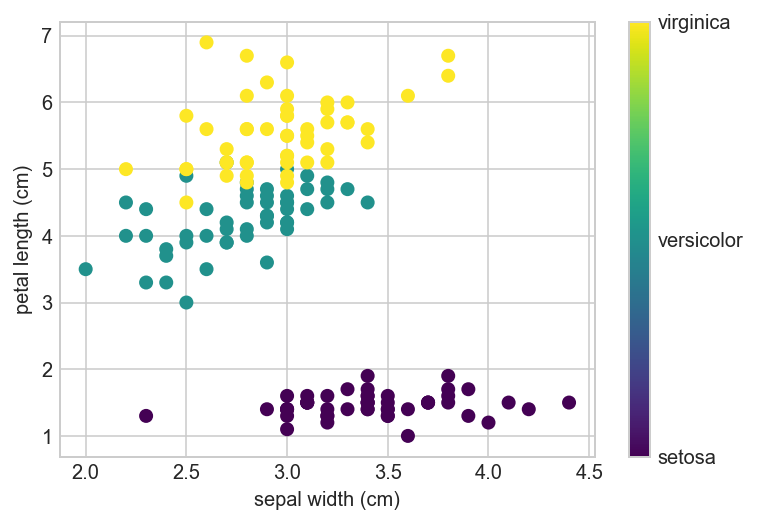

In [221]:
@interact(x_feature_index=(0, 2), y_feature_index=(1, 3))
def plot_iris_scatter(x_feature_index, y_feature_index):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(
        lambda i, *args: iris_data.target_names[int(i)])

    plt.scatter(
        iris_data.data[:, x_feature_index],
        iris_data.data[:, y_feature_index],
        c=iris_data.target,
        cmap=cm.viridis)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris_data.feature_names[x_feature_index])
    plt.ylabel(iris_data.feature_names[y_feature_index])

`seaborn` is another cool Python tool for creating nice-looking plots and figures. It includes some features that has to do with the Iris dataset.

In [206]:
df = seaborn.load_dataset("iris")

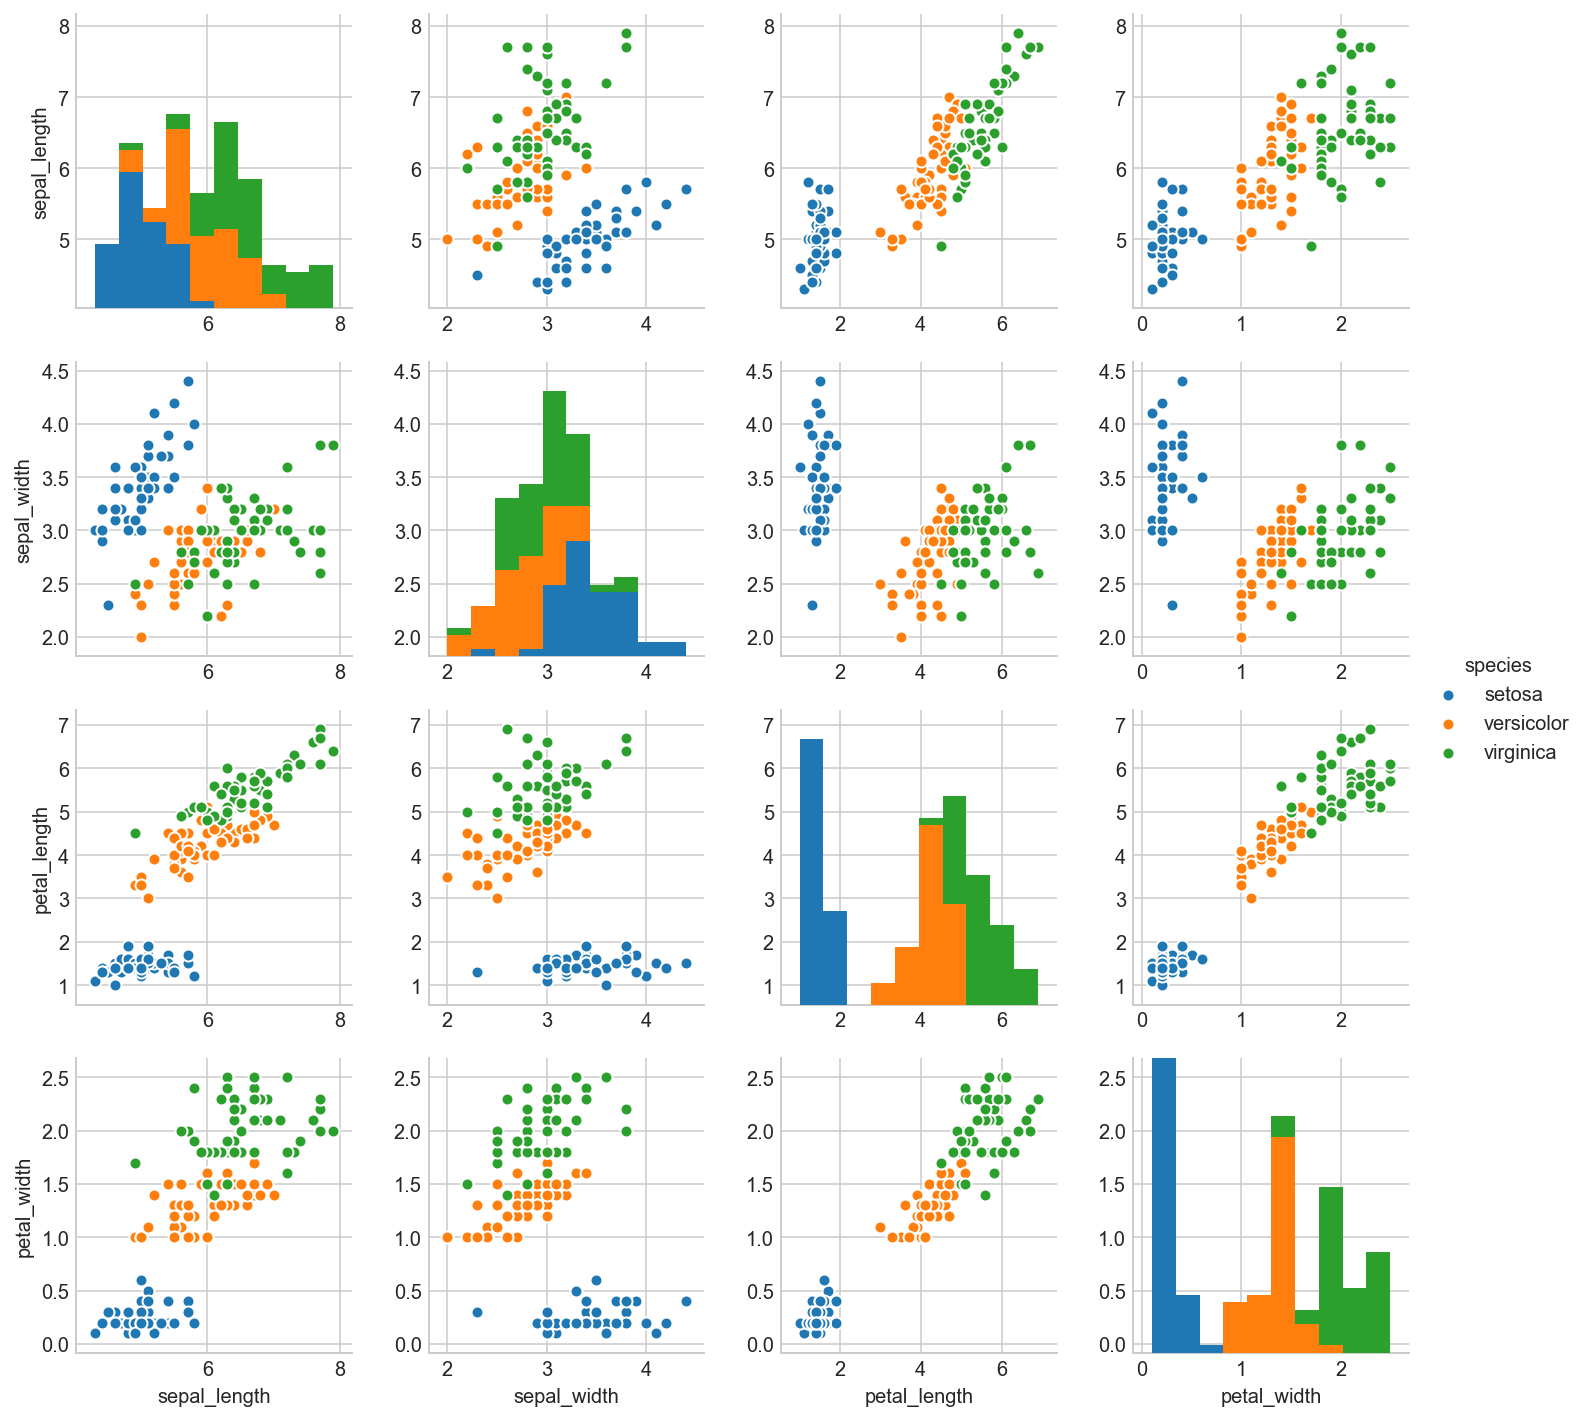

In [207]:
seaborn.pairplot(df, hue="species");

## Your task

* You have the data.
* Modify this Jupyter notebook, in particular,...
* you must implement a Multi-Layer Perceptron and **at least one other** machine learning method for recognizing the flowers in the iris dataset.
* Your algorithms must be `scikit-learn` estimators.
* Compare their performance.

Ask yourself some questions:

* What kind of problem is this?
* Must we transform the data?
* How would you implement the train/test/validation cycle for comparing .

### Implementation details

Please notice the special names that you should use for your classes: 

In [208]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin

In [209]:
from scipy.optimize import fmin_l_bfgs_b

from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import check_random_state, check_array, shuffle
from sklearn.utils.extmath import safe_sparse_dot

def relu(X):
    np.clip(X, 0, np.finfo(X.dtype).max, out=X)
    return X

def relu_derivative(Z):
    return (Z > 0).astype(Z.dtype)

def log_loss(y_true, y_prob):
    y_prob = np.clip(y_prob, 1e-10, 1 - 1e-10)
    return -np.sum(y_true * np.log(y_prob) +
                  (1 - y_true) * np.log(1 - y_prob)) / y_prob.shape[0]

def _pack(layers_coef_, layers_intercept_):
    return np.hstack([l.ravel() for l in layers_coef_ + layers_intercept_])

# Remember to set the class name appropiately.
class MatheusAlvesMLP(BaseEstimator, ClassifierMixin):  # or RegressonMixin?
    def __init__(self, params=None):
        if params is None:
            self.ctor({})
        else:
            self.ctor(params)

    def ctor(self, params):
        self.alpha = params.get("alpha", 0.00001)
        self.learning_rate = params.get("learning_rate", "constant")
        self.learning_rate_init = params.get("learning_rate_init", 0.5)
        self.max_iter = params.get("max_iter", 200)
        self.hidden_layer_sizes = params.get("hidden_layer_sizes", 100)
        self.shuffle = params.get("shuffle", False) 
        self.random_state = params.get("random_state",None)
        self.tol = params.get("tol", 1e-5)

        self.verbose = True
        self.layers_coef_ = None
        self.layers_intercept_ = None
        self.cost_ = None
        self.n_iter_ = None
        self.learning_rate_ = None
        self.classes_ = None
        self.t_ = None
        self.label_binarizer_ = LabelBinarizer()    

    def _unpack(self, packed_parameters):
        for i in range(self.n_layers_ - 1):
            start, end, shape = self._coef_indptr[i]
            self.layers_coef_[i] = np.reshape(packed_parameters[start:end],
                                              shape)

            start, end = self._intercept_indptr[i]
            self.layers_intercept_[i] = packed_parameters[start:end]

    def _forward_pass(self, activations, with_output_activation=True):
        for i in range(self.n_layers_ - 1):
            activations[i + 1] = safe_sparse_dot(activations[i],
                                                 self.layers_coef_[i])
            activations[i + 1] += self.layers_intercept_[i]

            # For the hidden layers
            if i + 1 != self.n_layers_ - 1:
                activations[i + 1] = relu(activations[i + 1])

        # For the last layer
        if with_output_activation:
            activations[i + 1] = relu(activations[i + 1])

        return activations

    def _compute_cost_grad(self, layer, n_samples, activations, deltas,
                           coef_grads, intercept_grads):
        coef_grads[layer] = safe_sparse_dot(activations[layer].T,
                                            deltas[layer])
        coef_grads[layer] += (self.alpha * self.layers_coef_[layer])
        coef_grads[layer] /= n_samples

        intercept_grads[layer] = np.mean(deltas[layer], 0)

        return coef_grads, intercept_grads

    def _cost_grad_lbfgs(self, packed_coef_inter, X, y, activations, deltas,
                         coef_grads, intercept_grads):
        self._unpack(packed_coef_inter)
        cost, coef_grads, intercept_grads = self._backprop(X, y, activations,
                                                           deltas, coef_grads,
                                                           intercept_grads)
        self.n_iter_ += 1
        grad = _pack(coef_grads, intercept_grads)
        return cost, grad

    def _backprop(self, X, y, activations, deltas, coef_grads,
                  intercept_grads):
        n_samples = X.shape[0]

        # Step (1/3): Forward propagate
        activations = self._forward_pass(activations)

        # Step (2/3): Get cost
        cost = log_loss(y, activations[-1])
        # Add L2 regularization term to cost
        values = np.sum(np.array([np.sum(s ** 2) for s in self.layers_coef_]))
        cost += (0.5 * self.alpha) * values / n_samples

        # Step (3/3): Backward propagate
        last = self.n_layers_ - 2

        diff = y - activations[-1]
        deltas[last] = -diff

        # Compute gradient for the last layer
        coef_grads, intercept_grads = self._compute_cost_grad(last, n_samples,
                                                              activations,
                                                              deltas,
                                                              coef_grads,
                                                              intercept_grads)

        # Iterate over the hidden layers
        for i in range(self.n_layers_ - 2, 0, -1):
            deltas[i - 1] = safe_sparse_dot(deltas[i],
                                            self.layers_coef_[i].T)
            deltas[i - 1] *= relu_derivative(activations[i])

            coef_grads, intercept_grads = self._compute_cost_grad(i - 1,
                                                          n_samples,
                                                          activations,
                                                          deltas,
                                                          coef_grads,
                                                          intercept_grads)

        return cost, coef_grads, intercept_grads   

    def fit(self, X, y):
        # Make sure self.hidden_layer_sizes is a list
        hidden_layer_sizes = self.hidden_layer_sizes
        if not hasattr(hidden_layer_sizes, "__iter__"):
            hidden_layer_sizes = [hidden_layer_sizes]
        hidden_layer_sizes = list(hidden_layer_sizes)

        n_samples, n_features = X.shape

        self.label_binarizer_.fit(y)

        if self.classes_ is None:
            self.classes_ = self.label_binarizer_.classes_
        else:
            classes = self.label_binarizer_.classes_
            if not np.all(np.in1d(classes, self.classes_)):
                raise ValueError("`y` has classes not in `self.classes_`."
                                 " `self.classes_` has %s. 'y' has %s." %
                                 (self.classes_, classes))

        y = self.label_binarizer_.transform(y)

        # Ensure y is 2D
        if y.ndim == 1:
            y = y.reshape((-1, 1))

        self.n_outputs_ = y.shape[1]

        layer_units = ([n_features] + hidden_layer_sizes +
                       [self.n_outputs_])

        # First time training the model
        if self.layers_coef_ is None:
            # Initialize parameters
            self.n_iter_ = 0
            self.t_ = 0
            self.learning_rate_ = self.learning_rate_init
            self.n_outputs_ = y.shape[1]

            # Compute the number of layers
            self.n_layers_ = len(layer_units)

            # Initialize coefficient and intercept layers
            self.layers_coef_ = []
            self.layers_intercept_ = []

            for i in range(self.n_layers_ - 1):
                rng = check_random_state(self.random_state)

                n_fan_in = layer_units[i]
                n_fan_out = layer_units[i + 1]

                # Use the initialization method recommended by
                # Glorot et al.
                weight_init_bound = np.sqrt(6. / (n_fan_in + n_fan_out))

                self.layers_coef_.append(rng.uniform(-weight_init_bound,
                                                     weight_init_bound,
                                                     (n_fan_in, n_fan_out)))
                self.layers_intercept_.append(rng.uniform(-weight_init_bound,
                                                          weight_init_bound,
                                                          n_fan_out))

        if self.shuffle:
            X, y = shuffle(X, y, random_state=self.random_state)
        batch_size = n_samples

        # Initialize lists
        activations = [X]
        activations.extend(np.empty((batch_size, n_fan_out))
                           for n_fan_out in layer_units[1:])
        deltas = [np.empty_like(a_layer) for a_layer in activations]

        coef_grads = [np.empty((n_fan_in, n_fan_out)) for n_fan_in,
                      n_fan_out in zip(layer_units[:-1],
                                       layer_units[1:])]

        intercept_grads = [np.empty(n_fan_out) for n_fan_out in
                           layer_units[1:]]
        
        # START LBFGS algorithm
        # Store meta information for the parameters
        self._coef_indptr = []
        self._intercept_indptr = []
        start = 0

        # Save sizes and indices of coefficients for faster unpacking
        for i in range(self.n_layers_ - 1):
            n_fan_in, n_fan_out = layer_units[i], layer_units[i + 1]

            end = start + (n_fan_in * n_fan_out)
            self._coef_indptr.append((start, end, (n_fan_in, n_fan_out)))
            start = end

        # Save sizes and indices of intercepts for faster unpacking
        for i in range(self.n_layers_ - 1):
            end = start + layer_units[i + 1]
            self._intercept_indptr.append((start, end))
            start = end

        # Run LBFGS
        packed_coef_inter = _pack(self.layers_coef_,
                                  self.layers_intercept_)

        if self.verbose is True or self.verbose >= 1:
            iprint = 1
        else:
            iprint = -1

        optimal_parameters, self.cost_, d = fmin_l_bfgs_b(
            x0=packed_coef_inter,
            func=self._cost_grad_lbfgs,
            maxfun=self.max_iter,
            iprint=iprint,
            pgtol=self.tol,
            args=(X, y, activations, deltas, coef_grads, intercept_grads))

        self._unpack(optimal_parameters)

        return self

    def _decision_scores(self, X):
        X = check_array(X, accept_sparse=['csr', 'csc', 'coo'])
        # Make sure self.hidden_layer_sizes is a list
        hidden_layer_sizes = self.hidden_layer_sizes
        if not hasattr(hidden_layer_sizes, "__iter__"):
            hidden_layer_sizes = [hidden_layer_sizes]
        hidden_layer_sizes = list(hidden_layer_sizes)

        layer_units = [X.shape[1]] + hidden_layer_sizes + \
            [self.n_outputs_]

        # Initialize layers
        activations = []
        activations.append(X)

        for i in range(self.n_layers_ - 1):
            activations.append(np.empty((X.shape[0],
                                         layer_units[i + 1])))
        # forward propagate
        self._forward_pass(activations, with_output_activation=False)
        y_pred = activations[-1]

        return y_pred

    

    def decision_function(self, X):
        y_scores = self._decision_scores(X)

        if self.n_outputs_ == 1:
            return y_scores.ravel()
        else:
            return y_scores

    def predict(self, X):
        y_scores = self.decision_function(X)
        y_scores = relu(y_scores)

        return self.label_binarizer_.inverse_transform(y_scores)

In [210]:
# Remember to set the class name appropiately.
class MatheusAlvesGaussianNaiveBayers(BaseEstimator, ClassifierMixin):  # or RegressonMixin?
    
    def __init__(self, params=None):
        'If params is None the method is initialized with default values.'
        pass
    
    def predict(self, X):
        jll = self.joint_log_likelihood(X)
        y_pred = self.unique_y[np.argmax(jll, axis=1)]
        return y_pred

    def fit(self, X, y):
        self.unique_y = unique_y = np.unique(y)
        n_classes = unique_y.shape[0]
        _, n_features = X.shape

        self.theta = np.empty((n_classes, n_features))
        self.sigma = np.empty((n_classes, n_features))
        self.class_prior = np.empty(n_classes)
        for i, y_i in enumerate(unique_y):
            self.theta[i, :] = np.mean(X[y == y_i, :], axis=0)
            self.sigma[i, :] = np.var(X[y == y_i, :], axis=0)
            self.class_prior[i] = np.float(np.sum(y == y_i)) / n_classes
        return self

    def joint_log_likelihood(self, X):
        X = np.atleast_2d(X)
        joint_log_likelihood = []
        for i in range(np.size(self.unique_y)):
            jointi = np.log(self.class_prior[i])
            n_ij = - 0.5 * np.sum(np.log(np.pi * self.sigma[i, :]))
            n_ij -= 0.5 * np.sum(((X - self.theta[i, :]) ** 2) / (self.sigma[i, :]), 1)
            joint_log_likelihood.append(jointi + n_ij)
        joint_log_likelihood = np.array(joint_log_likelihood).T
        return joint_log_likelihood
    

# Separating training and validation sets from the iris dataset

In [211]:
from random import sample
chosen_indexes = sample(range(0,149),105)
training_data = []
training_target = []
validation_data = []
validation_target = []
for i in range(0,149):
    if i in chosen_indexes:
        training_data.append(iris_data.data[i])
        training_target.append(iris_data.target[i])
    else:
        validation_data.append(iris_data.data[i])
        validation_target.append(iris_data.target[i])
training_data=np.asarray(training_data)
training_target=np.asarray(training_target)
validation_data=np.asarray(validation_data)
validation_target=np.asarray(validation_target)

# Using the Gaussian Naive-Bayers

In [212]:
from sklearn.metrics import accuracy_score
classifier = MatheusAlvesGaussianNaiveBayers()
# training 
classifier.fit(training_data,training_target)
#validating
predict = classifier.predict(validation_data)
print("Classifier Accuracy: {:f}".format(accuracy_score(validation_target,predict)))

Classifier Accuracy: 0.954545


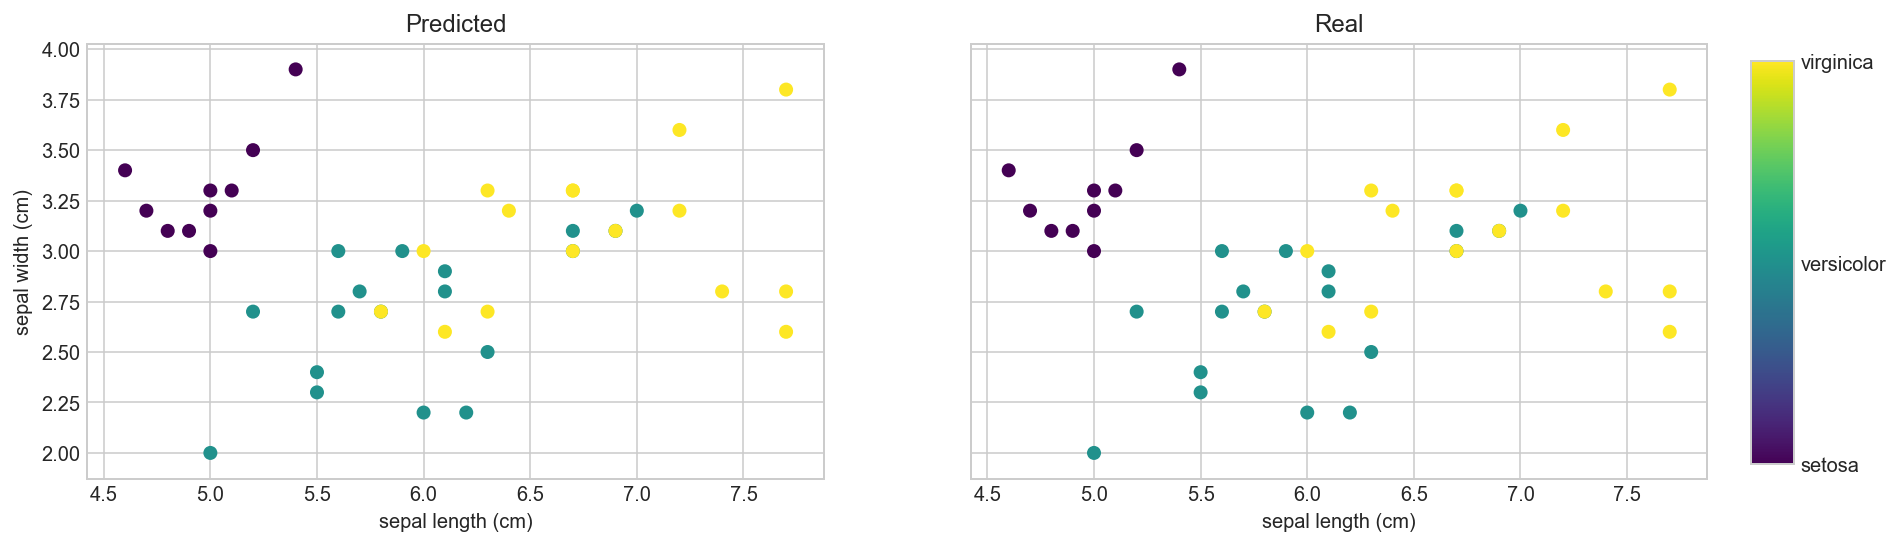

In [218]:
@interact(x_feature_index=(0, 3), y_feature_index=(0, 3))
def plot_iris_scatter(x_feature_index=0, y_feature_index=1):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(
        lambda i, *args: iris_data.target_names[int(i)])
    f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    ax1.scatter(
        validation_data[:, x_feature_index],
        validation_data[:, y_feature_index],
        c=predict,
        cmap=cm.viridis)
    ax1.set_title("Predicted")
    pos2 = ax2.scatter(
        validation_data[:, x_feature_index],
        validation_data[:, y_feature_index],
        c=validation_target,
        cmap=cm.viridis)
    ax2.set_title("Real")
    f.subplots_adjust(right=2)
    cbar_ax = f.add_axes([2.05, 0.15, 0.05, 0.7])
    ax1.set_xlabel(iris_data.feature_names[x_feature_index])
    ax2.set_xlabel(iris_data.feature_names[x_feature_index])
    ax1.set_ylabel(iris_data.feature_names[y_feature_index])
    f.colorbar(pos2,cax=cbar_ax,format=formatter,ticks=[0,1,2])

# Using the MLP with the LBFGS algorithm


In [214]:
classifier = MatheusAlvesMLP()
# training 
classifier.fit(training_data,training_target)
# validating
predict = classifier.predict(validation_data)
print("Classifier Accuracy: {:f}".format(accuracy_score(validation_target,predict)))

Classifier Accuracy: 1.000000


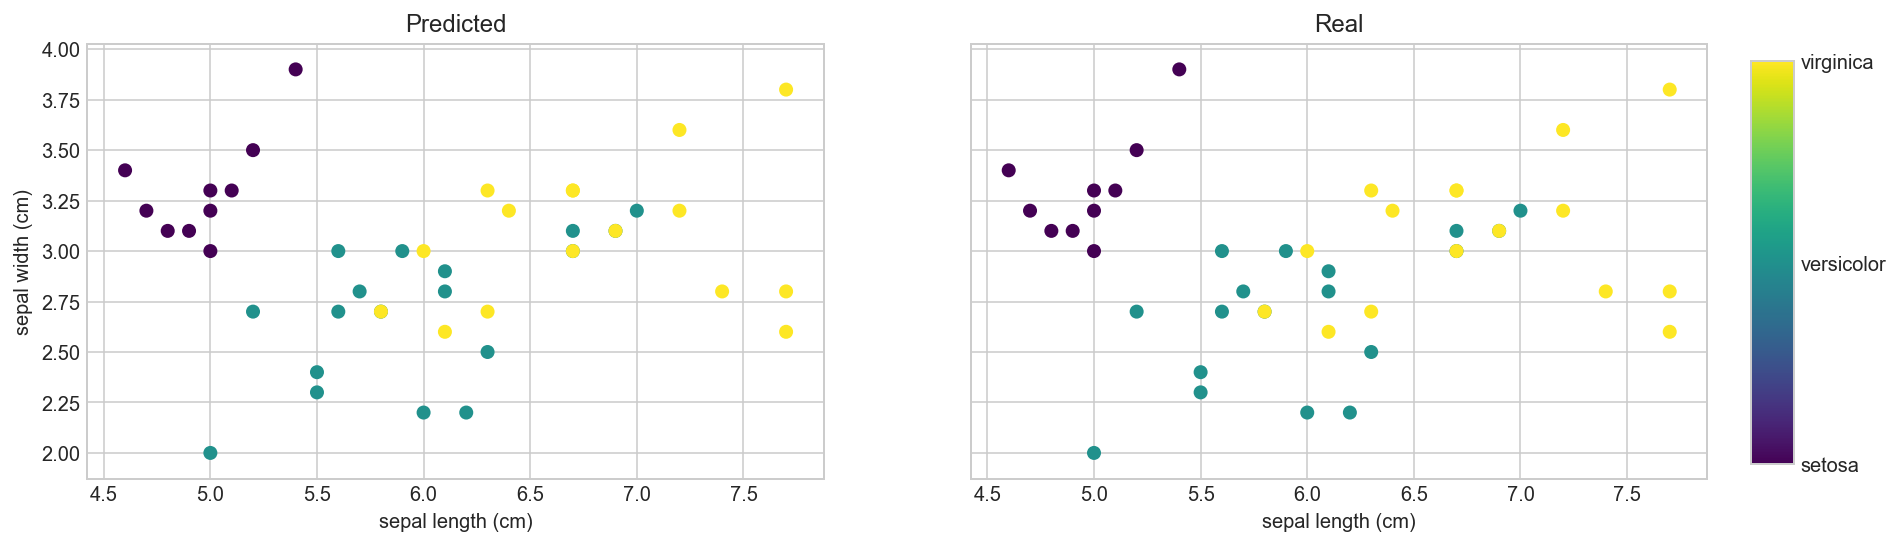

In [219]:
@interact(x_feature_index=(0, 3), y_feature_index=(0, 3))
def plot_iris_scatter(x_feature_index=0, y_feature_index=1):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(
        lambda i, *args: iris_data.target_names[int(i)])
    f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    ax1.scatter(
        validation_data[:, x_feature_index],
        validation_data[:, y_feature_index],
        c=predict,
        cmap=cm.viridis)
    ax1.set_title("Predicted")
    pos2 = ax2.scatter(
        validation_data[:, x_feature_index],
        validation_data[:, y_feature_index],
        c=validation_target,
        cmap=cm.viridis)
    ax2.set_title("Real")
    f.subplots_adjust(right=2)
    cbar_ax = f.add_axes([2.05, 0.15, 0.05, 0.7])
    ax1.set_xlabel(iris_data.feature_names[x_feature_index])
    ax2.set_xlabel(iris_data.feature_names[x_feature_index])
    ax1.set_ylabel(iris_data.feature_names[y_feature_index])
    f.colorbar(pos2,cax=cbar_ax,format=formatter,ticks=[0,1,2])

Bear in mind:

* Prepare the Jupyter notebook describing your work and showing your results -> **plots are expected!**
* Do not used any pre-existing library (like Keras, theano, Tensoflow, etc.) for programming your algorithms.
* You may use them for support but not for the algorithm itself.
* `params` is a dictionary with the configuration of the algorithm: layers, number of nodes in each layer, activation functions, learning rates, etc.
* See `scikit-learn` docs on how to [implement an estimator](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator).

# Submission

Submit your notebook files via Google Classroom.

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

In [216]:
%load_ext version_information
%version_information numpy, matplotlib, sklearn

ModuleNotFoundError: No module named 'version_information'

In [ ]:
# this code is here for cosmetic reasons
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen('https://raw.githubusercontent.com/lmarti/jupyter_custom/master/custom.include').read().decode('utf-8'))

---